#Task 2: Time Series Analysis
##Objectives:
- Plot time-series data and identify patterns.

- Decompose the series into trend, seasonality, and
residuals using statsmodels.

- Perform moving average smoothing and plot the results.

# Step 1 Import Libraries & Load and Inspect the Data

In [2]:
# Step 0: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [3]:
# Load the stock prices dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('2) Stock Prices Data Set.csv')

# Display first few rows and info
print(df.head())
print("\nData types:")
print(df.dtypes)


Saving 2) Stock Prices Data Set.csv to 2) Stock Prices Data Set (1).csv
  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391

Data types:
symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


#Professional interpretation:

This step confirms the presence of Date and Price (or similar) columns. We check data types because the Date column must be converted to datetime for time-series analysis.

# Step 2: Convert Date Column to Datetime and Set Index

In [4]:
# Assuming columns are ['Date', 'Close'] or similar
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.set_index('date', inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497472 entries, 2014-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   open    497461 non-null  float64
 2   high    497464 non-null  float64
 3   low     497464 non-null  float64
 4   close   497472 non-null  float64
 5   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 26.6+ MB
None


#Professional interpretation:

Converting the date column to datetime ensures time-aware operations like resampling and decomposition. Setting Date as the index makes the series suitable for statsmodels and rolling calculations.

# Step 3: Plot Raw Time Series

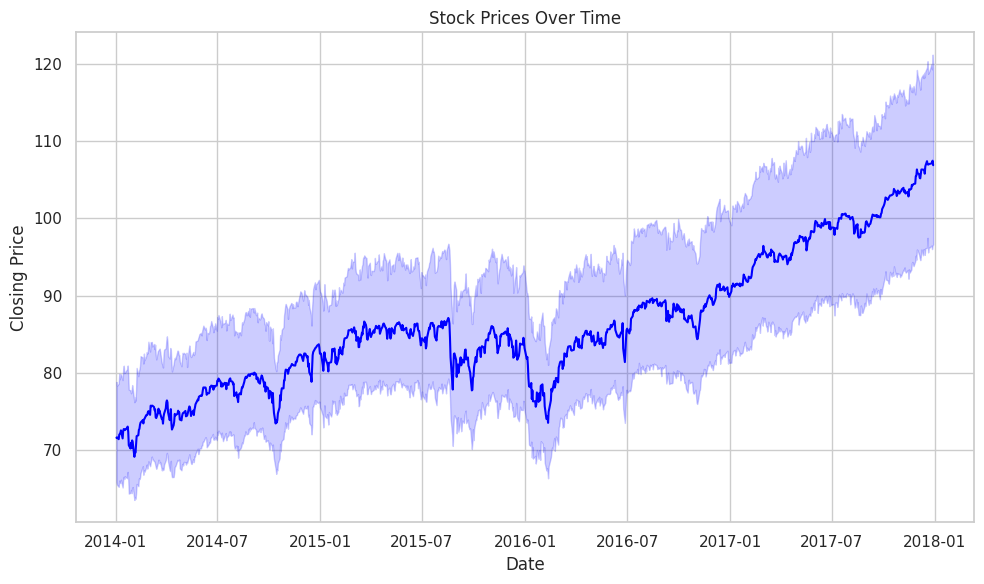

In [5]:
plt.figure()
sns.lineplot(data=df, x=df.index, y='close', color='blue')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

#Professional interpretation:

The initial line plot helps us visually detect overall trend (upward or downward), volatility patterns, and any seasonal fluctuations (e.g., monthly or quarterly cycles). For stocks, strong seasonality is less common, but trend and volatility are key.

# Step 4: Decompose the Series

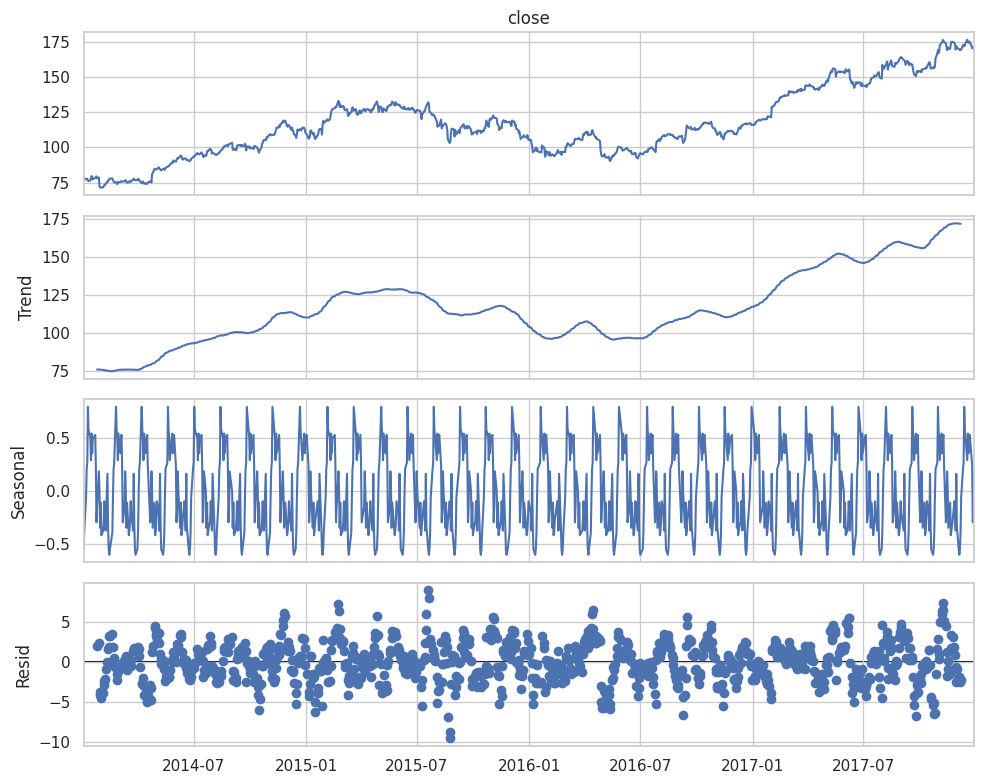

In [6]:
# Select data for a single stock symbol (e.g., AAPL)
aapl_df = df[df['symbol'] == 'AAPL'].copy()

decomposition = seasonal_decompose(aapl_df['close'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

#Professional interpretation:

- The decomposition breaks the series into:

- Trend: Long-term movement (e.g., overall upward drift in stock price).

- Seasonality: Repeating patterns (e.g., monthly or quarterly cycles, though for stocks it's usually weak).

- Residual: Random noise or unexplained variation.

If the seasonal component is negligible, the data is primarily trend-driven with random noise.

# Step 5: Apply Moving Average Smoothing

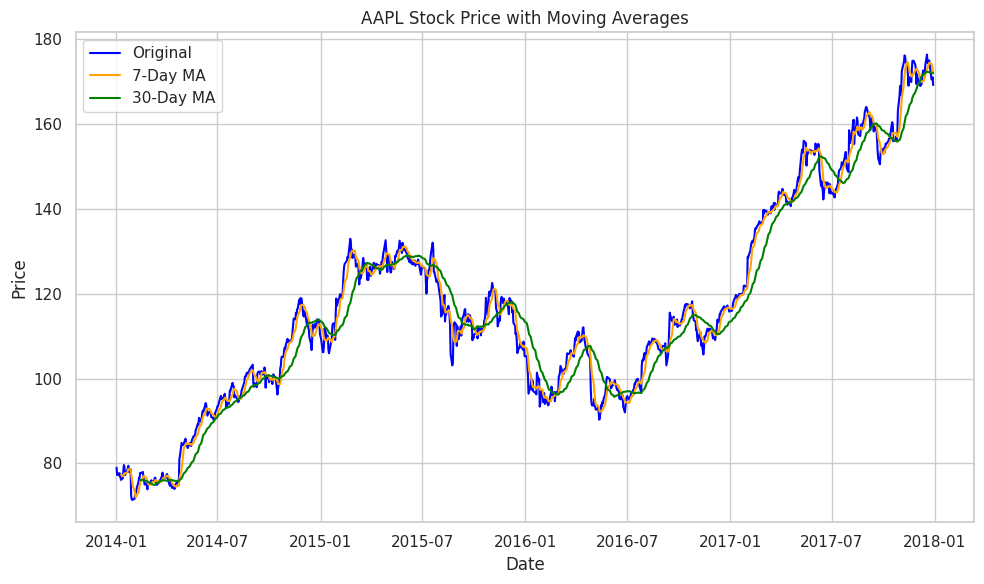

In [7]:
# Select data for a single stock symbol (e.g., AAPL)
aapl_df = df[df['symbol'] == 'AAPL'].copy()

# Calculate 7-day and 30-day moving averages
aapl_df['MA_7'] = aapl_df['close'].rolling(window=7).mean()
aapl_df['MA_30'] = aapl_df['close'].rolling(window=30).mean()

plt.figure()
sns.lineplot(data=aapl_df, x=aapl_df.index, y='close', label='Original', color='blue')
sns.lineplot(data=aapl_df, x=aapl_df.index, y='MA_7', label='7-Day MA', color='orange')
sns.lineplot(data=aapl_df, x=aapl_df.index, y='MA_30', label='30-Day MA', color='green')
plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

#Professional interpretation:

Moving averages smooth out short-term fluctuations and make long-term trends more visible.

- 7-day MA captures short-term movement (weekly trend).

- 30-day MA highlights longer-term trend, reducing noise.

In stock analysis, crossovers between short-term and long-term MAs are often used as trend signals.

#Professional Report Summary

We performed time-series analysis on stock price data to detect trends and patterns. The raw time series plot showed [insert trend: upward, downward, volatile]. Seasonal decomposition indicated [describe trend, seasonal, residual patterns]. Moving averages (7-day and 30-day) highlighted short-term vs long-term trends, smoothing out noise. This analysis provides insights for potential forecasting models and trading strategies.